# Bank Marketing (with social/economic context)

The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

# Loading Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Missing Attribute Values:** There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

In [6]:
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
var_numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]
print(len(var_categorical), len(var_numerical))

10 10


# Missing values

In [7]:
df.replace('unknown', np.NaN, inplace=True)

In [8]:
df.isnull().sum()/len(df)*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

In [9]:
# Number of distinct values in variables
for i, column in enumerate(df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df[column].nunique()))

0. Age: 78
1. Job: 11
2. Marital: 3
3. Education: 7
4. Default: 2
5. Housing: 2
6. Loan: 2
7. Contact: 2
8. Month: 10
9. Day_Of_Week: 5
10. Duration: 1544
11. Campaign: 42
12. Pdays: 27
13. Previous: 8
14. Poutcome: 3
15. Emp.Var.Rate: 10
16. Cons.Price.Idx: 26
17. Cons.Conf.Idx: 26
18. Euribor3M: 316
19. Nr.Employed: 11
20. Y: 2


In [10]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      

# Exploratory Data Analysis

## i. Univariate Analysis and Segmented Univariate Analysis

## a. Categorical Variables

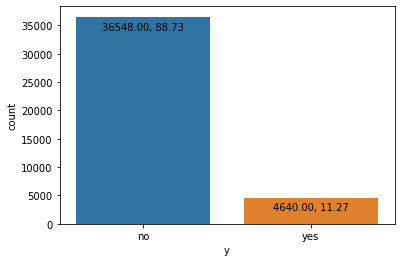

In [11]:
ax = sns.countplot(x = df["y"])  #Imbalanced dataset
label_values(ax, spacing=-15)
plt.show()

Job


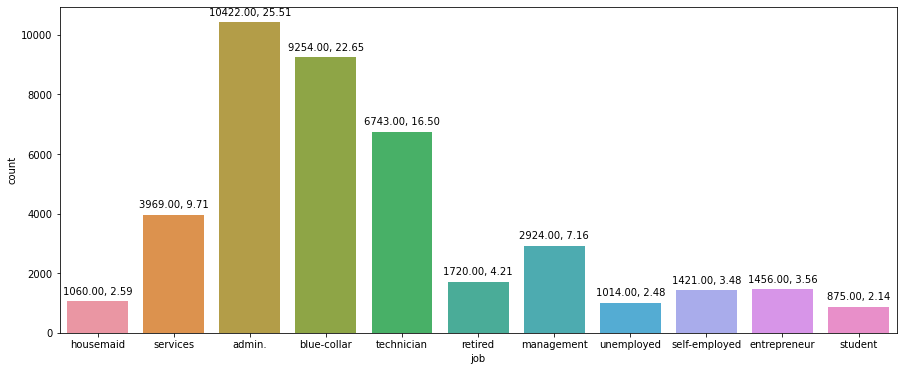

Marital


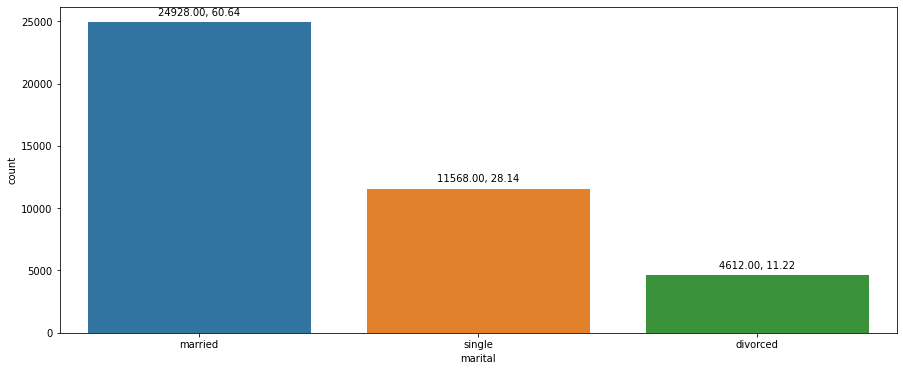

Education


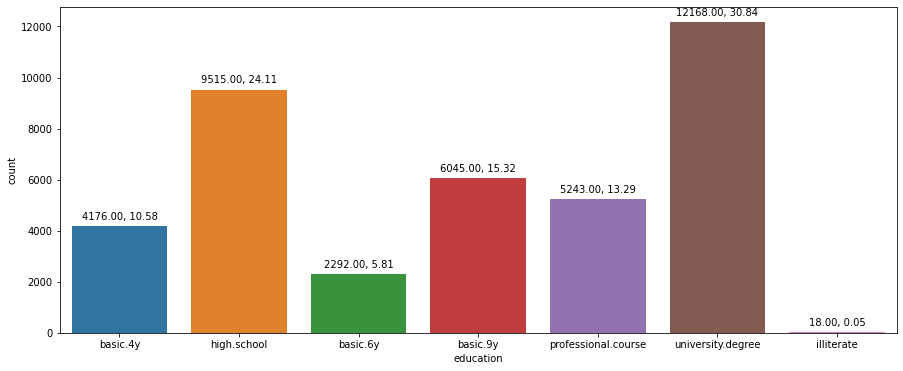

Default


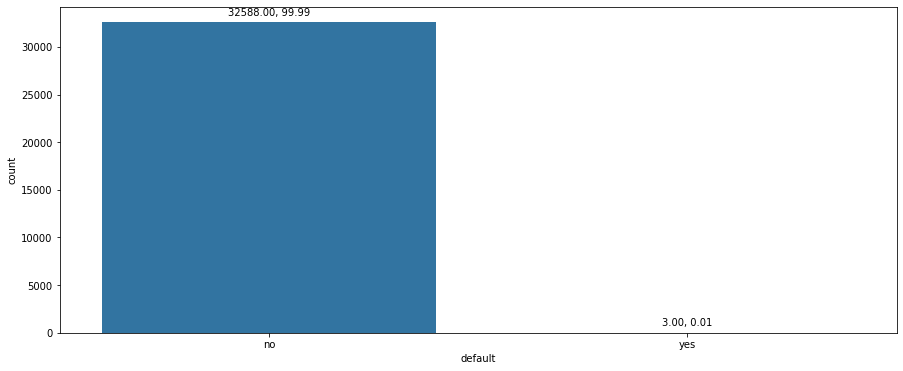

Housing


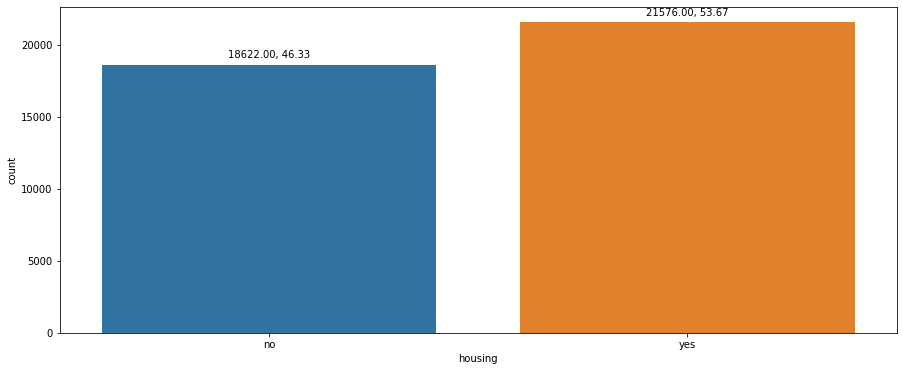

Loan


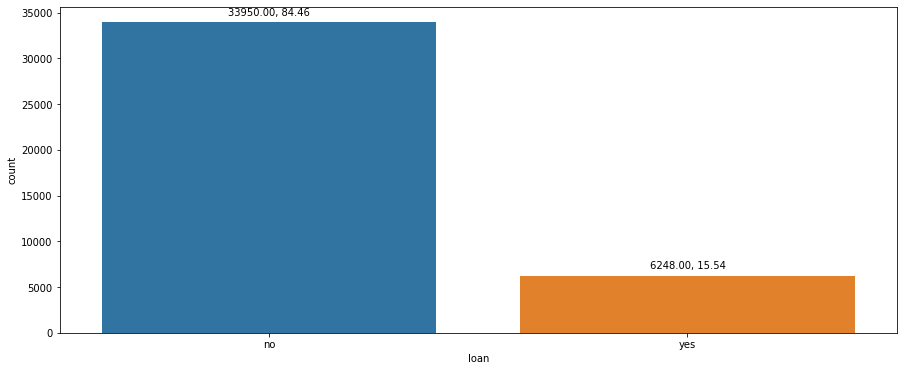

Contact


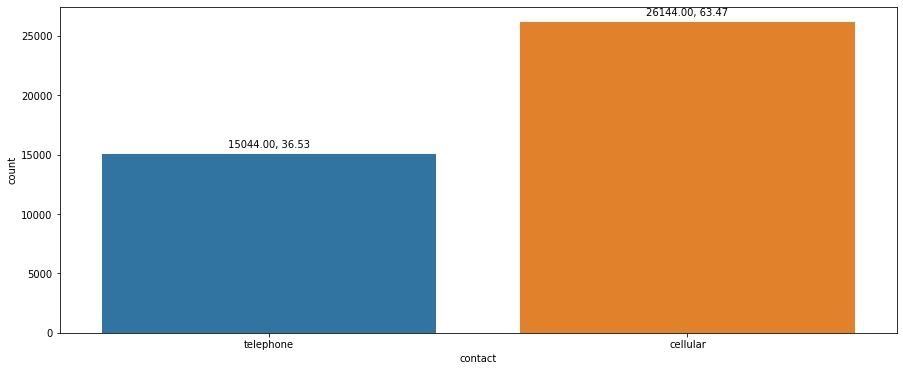

Month


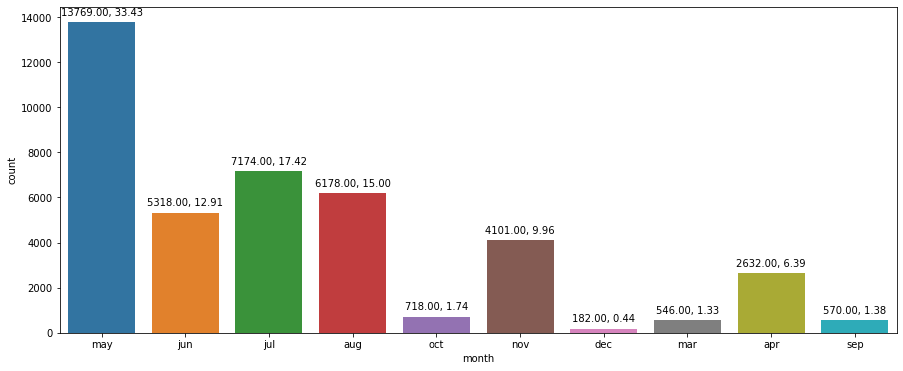

Day_Of_Week


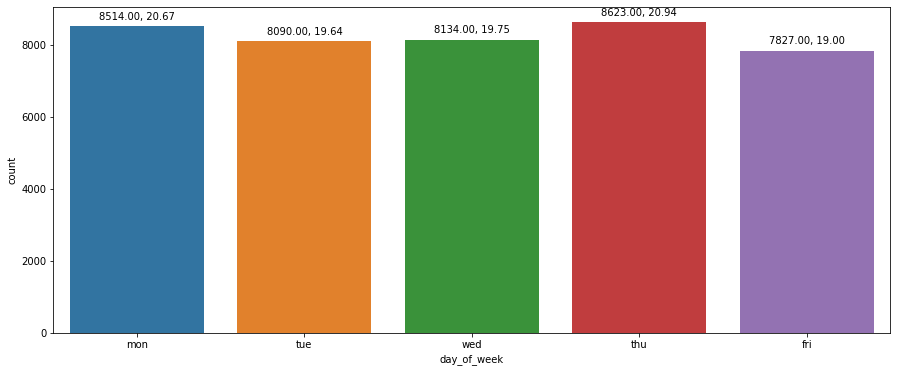

Poutcome


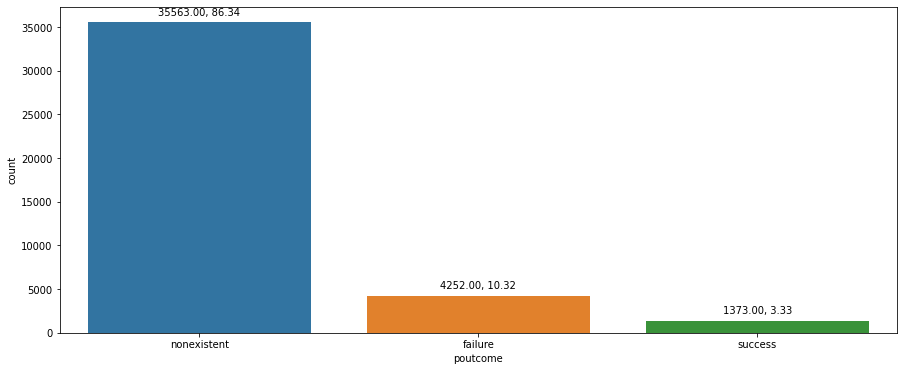

In [12]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column])
    label_values(ax)
    plt.show()

Job


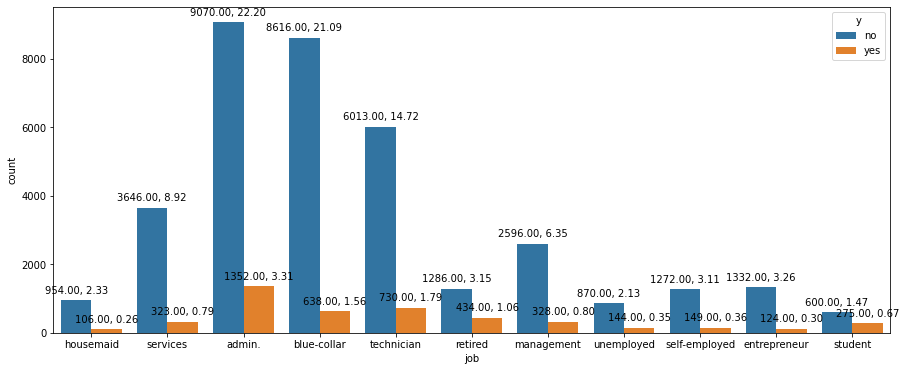

Marital


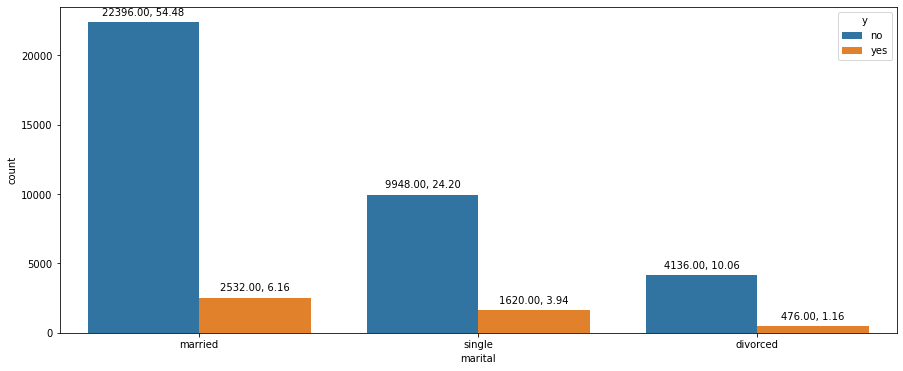

Education


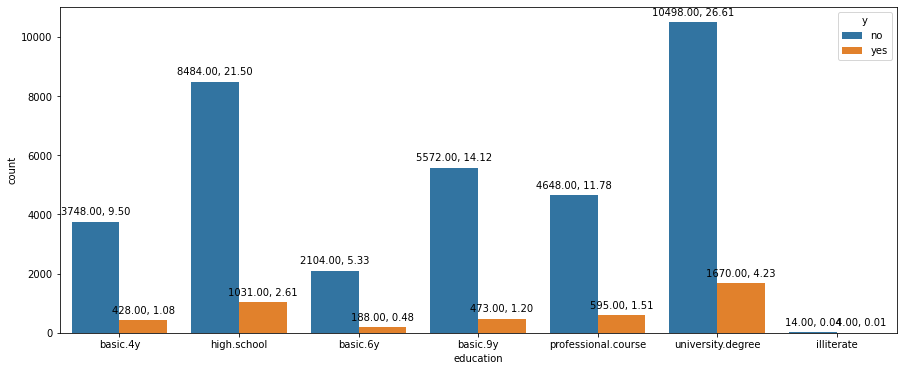

Default


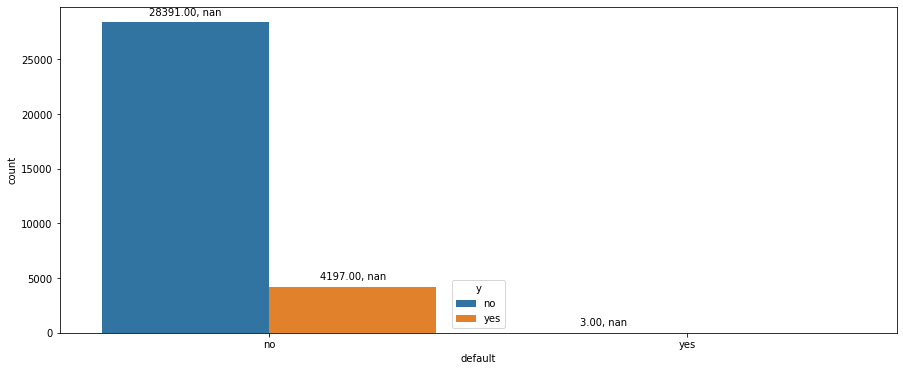

Housing


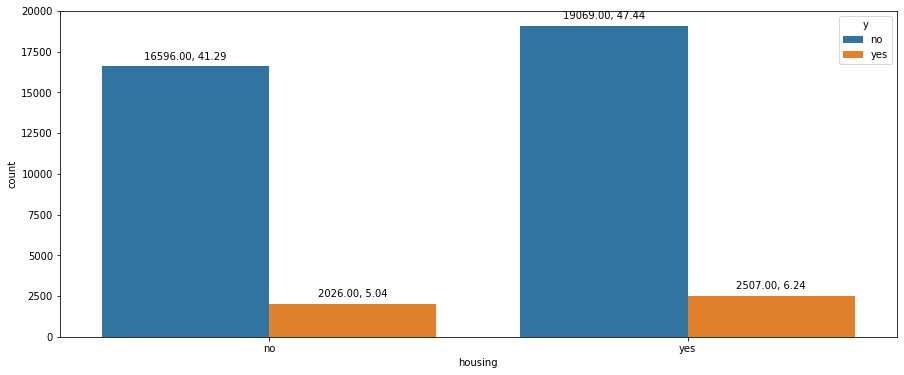

Loan


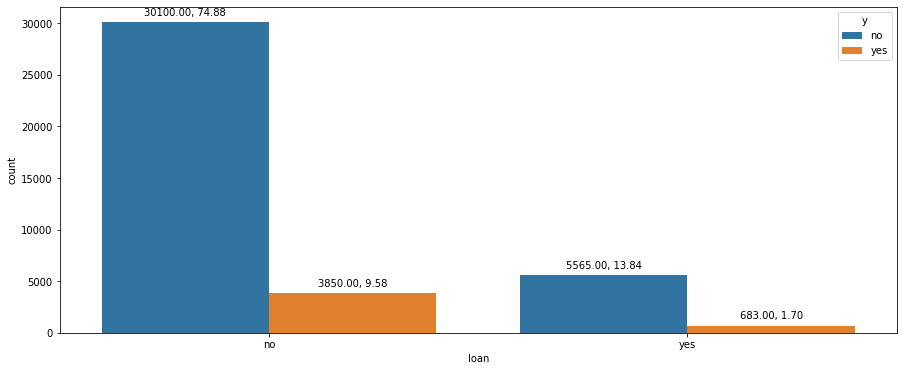

Contact


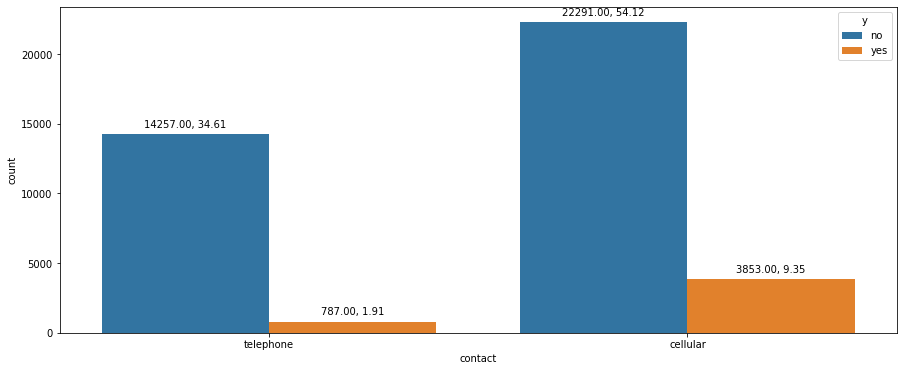

Month


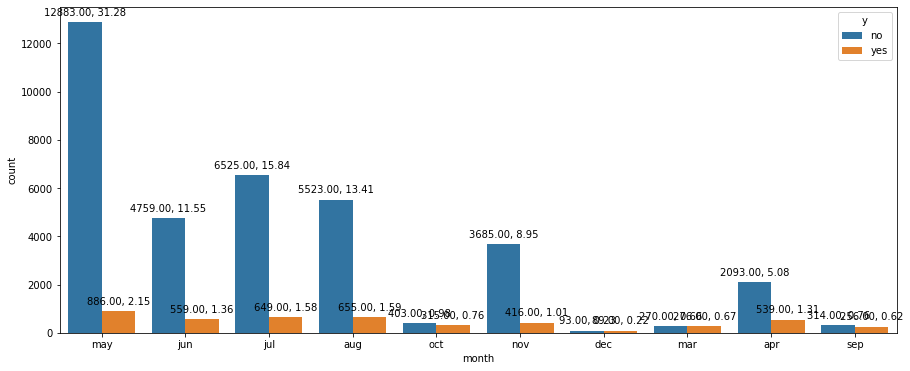

Day_Of_Week


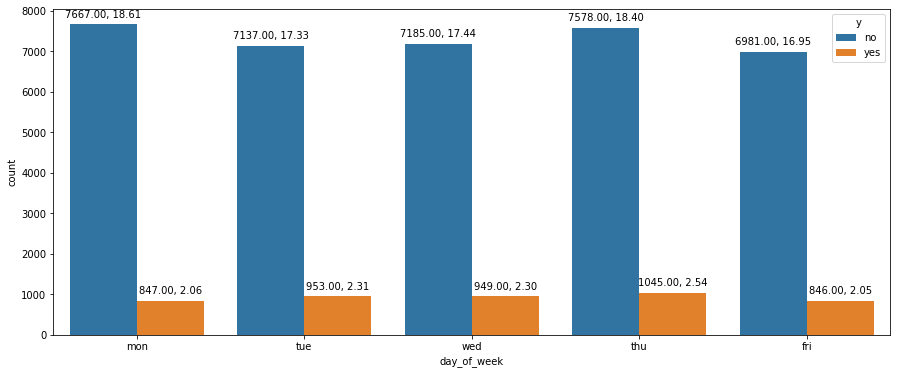

Poutcome


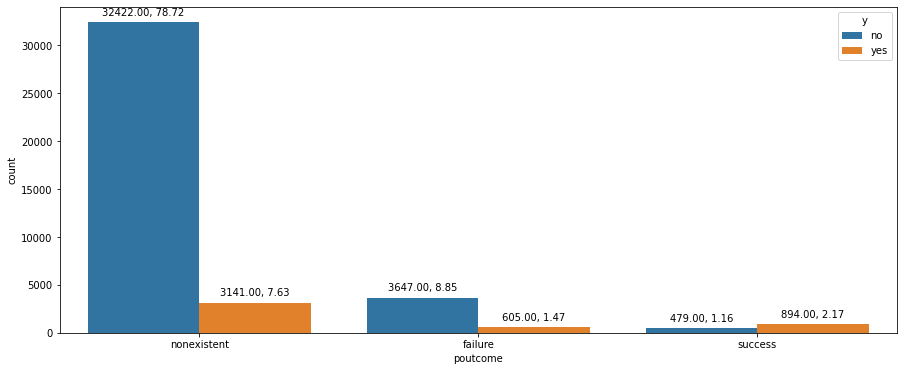

In [13]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column], hue=df["y"])
    label_values(ax)
    plt.show()

Poutcome


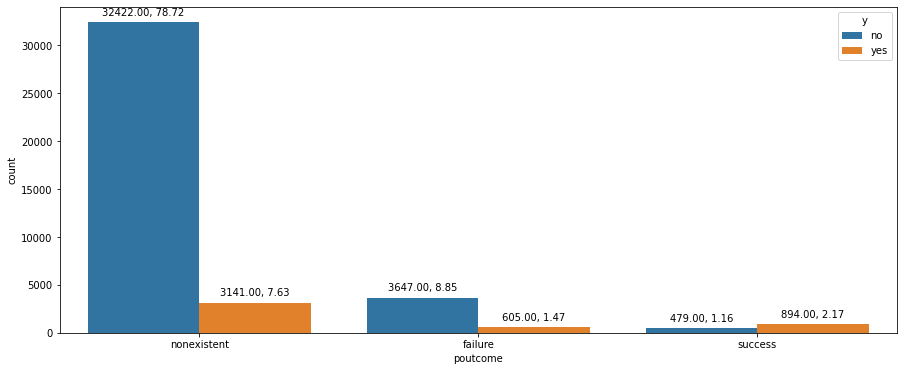

In [14]:
plt.figure(figsize=(15, 6))
print(column.title())
ax = sns.countplot(x = df["poutcome"], hue=df["y"])
label_values(ax)
plt.show()

**Insights from categorical variables (based on univariate analysis)**

    1. Job: Highest Number (around 25%) of application are from admin type of job.
    2. Default: Default variable has no impact on the client subscribing for term deposit. As we can see with no as input client took the term deposit and client having credit are not taking term deposit. So we will drop this feature.
    3. Marital: Around 60% of client were approached were married. 
    4. Education: Client with university degree and high school were approached more as compare to other and they have higher success rate as well. (in terms of term deposit number)
    5. Housing: Housing loan does not have much effect on the number of term deposit purchased.
    6. Loan: We approach around 84% of client with not having personal loan. 
    7. Contact: Around 64% calls are from cellular.
    8. Month: Around 33% were approached in may and in January, Febuary we don't have data or no one was approached. Success rate was almost same in june, july and August. 
    9. day_of_week: We have 5 days collected values. There is no significant different in the number of client approached and number of people subscribed.
    10. poutcome: If a client took the term deposit last time than there is higher chances of that client subscribing to it again.

In [15]:
# Default variable has no impact on the client subscribing for term deposit.
df.drop(["default"], axis = 1, inplace=True)

In [16]:
var_categorical = list(set(var_categorical) - set(['default']))

In [17]:
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   duration        38245 non-null  int64  
 10  campaign        38245 non-null  int64  
 11  pdays           38245 non-null  int64  
 12  previous        38245 non-null  int64  
 13  poutcome        38245 non-null  object 
 14  emp.var.rate    38245 non-null  float64
 15  cons.price.idx  38245 non-null  float64
 16  cons.conf.idx   38245 non-null  float64
 17  euribor3m       38245 non-null 

## b. Numerical Variables

In [19]:
#### Drop the duration (as Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.)
duration = df["duration"]
df.drop(["duration"], axis = 1, inplace=True)

In [20]:
var_numerical = list(set(var_numerical) - set(['duration']))

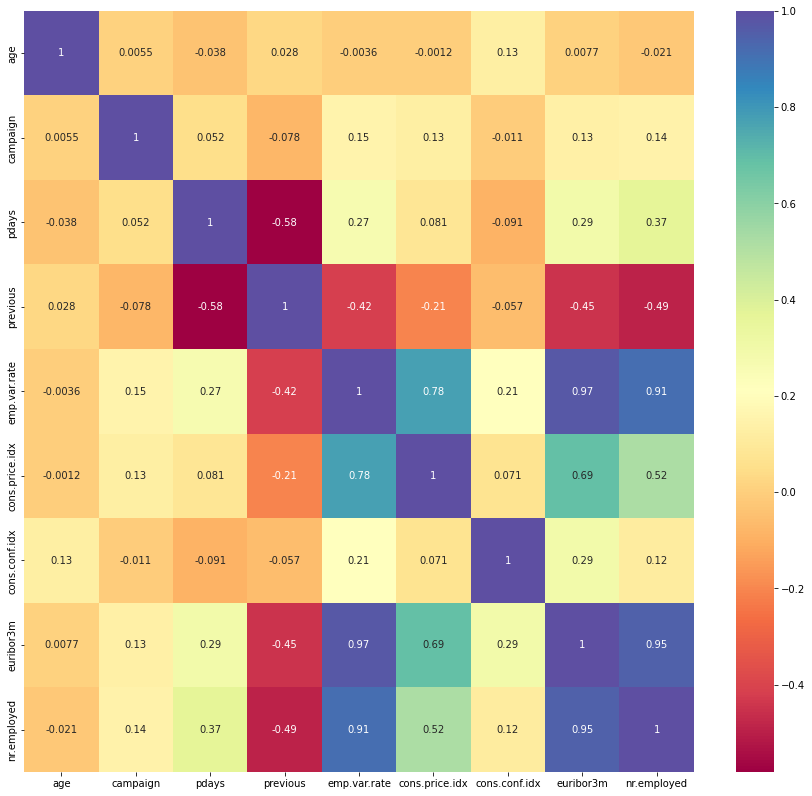

In [21]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

## Handle highly correlated variables

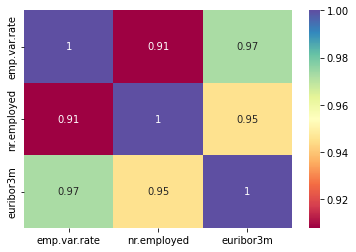

In [22]:
sns.heatmap(df[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='Spectral')
plt.show()

Positive high correlation between:
<br>    1. 'emp.var.rate' and 'nr.employed'
<br>    2. 'emp.var.rate' and 'euribor3m'
<br>    3. 'euribor3m' and 'nr.employed'

**Euribor** is the acronym for the Euro Interbank Offered Rate. This is the interest rate at which credit institutions lend money to each other, which is often referred to as **“the price of money”**.

With this we can say that 'emp.var.rate' (employment variation rate ) and 'nr.employed' (number of employees) are positively correlated with euribor.
So we will **drop 'emp.var.rate' and 'nr.employed'** as **'euribor'** also give us the price of money in current market.

In [23]:
df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)

In [24]:
var_numerical = list(set(var_numerical) - set(['emp.var.rate', 'nr.employed']))

Pdays


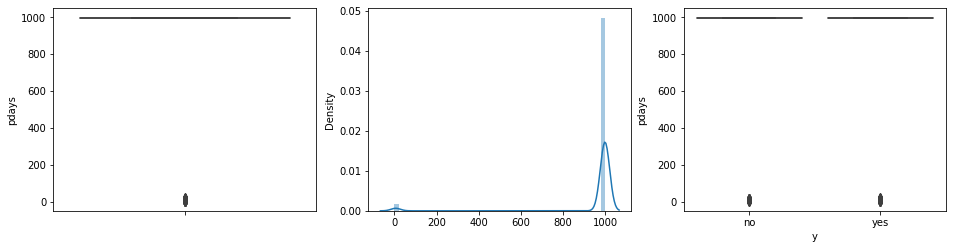

Cons.Price.Idx


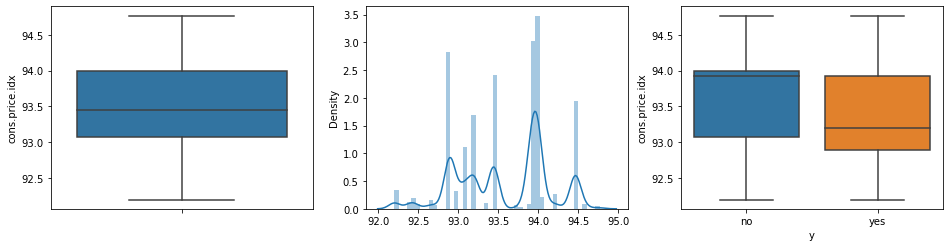

Euribor3M


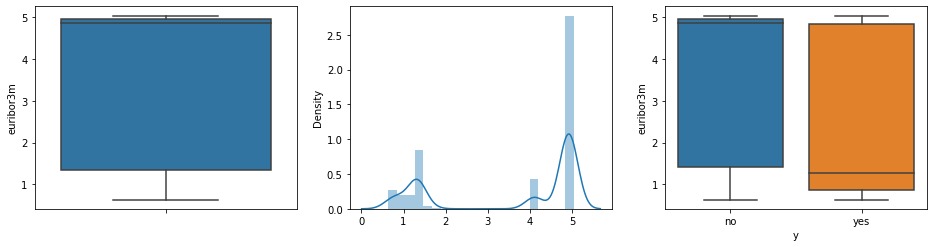

Age


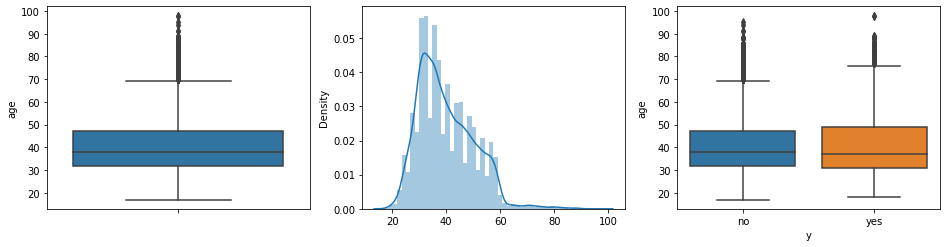

Previous


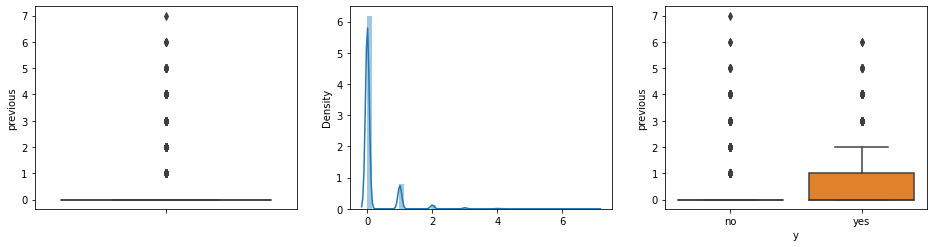

Campaign


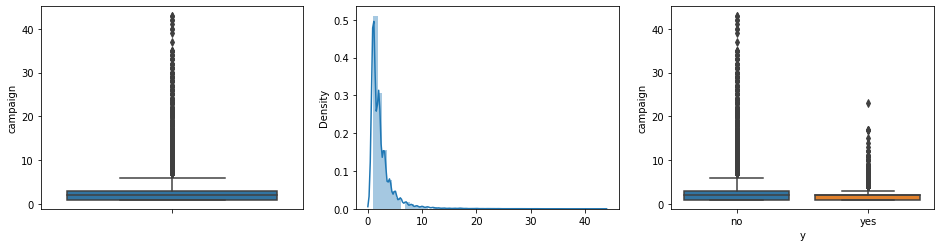

Cons.Conf.Idx


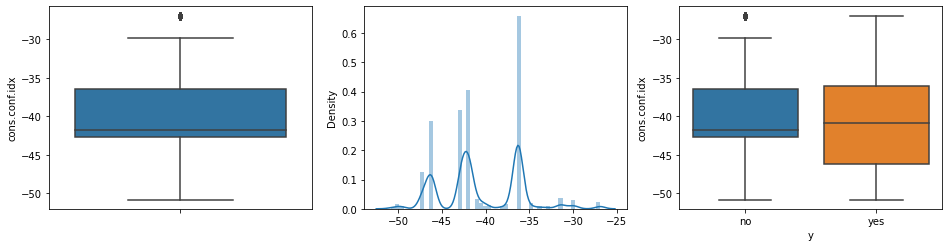

In [25]:
i = 1
for column in var_numerical:
    print(column.title())
    plt.subplots(figsize=(16, 35))
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(y = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.distplot(x = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(x = df["y"], y = df[column])
    i += 1
    plt.show()

In [26]:
df[var_numerical].describe()

,pdays,cons.price.idx,euribor3m,age,previous,campaign,cons.conf.idx
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,963.531651,93.570313,3.623298,39.860871,0.170009,2.566662,-40.541164
std,184.295254,0.576367,1.730226,10.289488,0.487169,2.767473,4.623200
min,0.000000,92.201000,0.634000,17.000000,0.000000,1.000000,-50.800000
25%,999.000000,93.075000,1.344000,32.000000,0.000000,1.000000,-42.700000
50%,999.000000,93.444000,4.857000,38.000000,0.000000,2.000000,-41.800000
75%,999.000000,93.994000,4.961000,47.000000,0.000000,3.000000,-36.400000
max,999.000000,94.767000,5.045000,98.000000,7.000000,43.000000,-26.900000


Look into 'campaign', 'age', 'previous', 'cons.conf.idx', 'pdays'

In [27]:
print(df["campaign"].quantile(0.05), len(df[df["campaign"]<df["campaign"].quantile(0.05)] ))
print(df["campaign"].quantile(0.95), len(df[df["campaign"]>df["campaign"].quantile(0.95)] ))

1.0 0
7.0 1636


In [28]:
df1 = df[(df["campaign"] > 23) & (df["y"] == 'yes')]
len(df1[['campaign', 'y']])

0

In [29]:
df1 = df[(df["campaign"] > 8) & (df["y"] == 'yes')]
print(len(df1[['campaign', 'y']]), len(df[df["campaign"]>8]))

49 1264


In [30]:
# We will convert all the values above 10 in campaign to 10
df["campaign"] = df["campaign"].apply(lambda x: 8 if x > 8 else x)

In [31]:
print(df["age"].quantile(0.05), len(df[df["age"]<df["age"].quantile(0.05)] ))
print(df["age"].quantile(0.95), len(df[df["age"]>df["age"].quantile(0.95)] ))

26.0 1484
58.0 1435


In [32]:
print(df["previous"].quantile(0.05), len(df[df["previous"]<df["previous"].quantile(0.05)] ))
print(df["previous"].quantile(0.95), len(df[df["previous"]>2] ))

0.0 0
1.0 273


In [33]:
for i in range(1, max(df["previous"])+1):
    print(i, end = " ")
    df1 = df[(df["previous"] >= i) & (df["y"] == 'yes')]
    print(len(df1[['previous', 'y']]), len(df[df["previous"]>= i]))

1 1336 5179
2 466 945
3 160 273
4 43 78
5 13 21
6 2 5
7 0 1


In [34]:
# We will convert all the values above 2 in previous to 2
df["previous"] = df["previous"].apply(lambda x: 2 if x >= 2 else x)

In [35]:
print(df["pdays"].quantile(0.05), len(df[df["pdays"]<df["pdays"].quantile(0.05)] ))
print(df["pdays"].quantile(0.95), len(df[df["pdays"]>df["pdays"].quantile(0.95)] ))

999.0 1366
999.0 0


In [36]:
df1 = df[(df["pdays"] >= 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]>=999]))
df1 = df[(df["pdays"] < 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<999]))
df1 = df[(df["pdays"] < 28) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<28]))
df1 = df[(df["pdays"] < 20) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<20]))
df1 = df[(df["pdays"] < 10) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<10]))

3393 36879
865 1366
865 1366
858 1358
734 1140


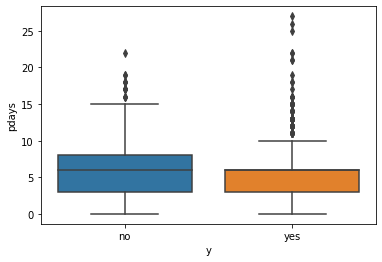

In [37]:
# Look into the pdays values which are less than 999
df1 = df[~(df["pdays"] >= 999)]
sns.boxplot(x = df1["y"], y = df1['pdays'])
plt.show()

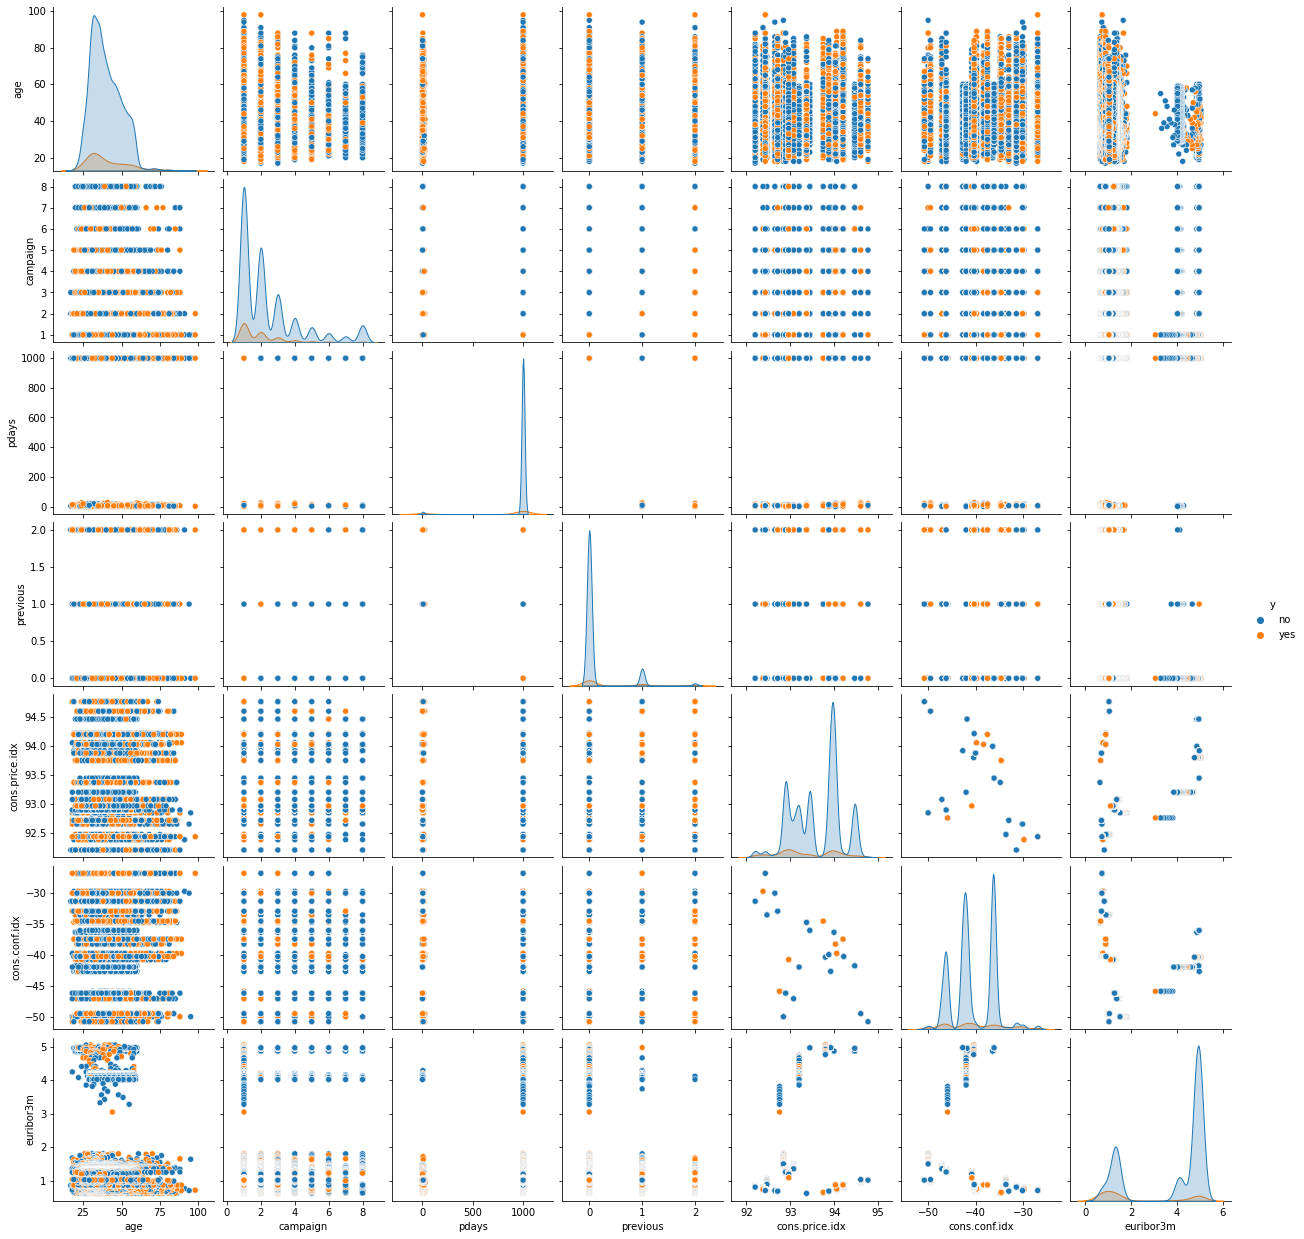

In [38]:
# visualizing numerical columns
sns.pairplot(hue='y', data = df)
plt.show()

<br> **Insights from continuous variables**
<br>
<br>
    1. Campaign: If the number of contacts performed during this campaign and for this client become more than 23 then there is very high possibility that client will not subscribe for term deposit. Even if we contact a person more than 8 times probability is still low.
    **We will drop this column as it will not be known before hand. But it is important to see that we should not contact any client more than 8 times during any campaign.**<br>
    2. Consumer price index: If this value is high then probability of client not subscribing is slightly higher. <br>
    3. Previous: If we contact client before a campaign then there is high chances that client will subscribe. We converted all the values above 2 to 2 based on the given data
    <br>
    4. Euribor 3 month rate: If this rate is high there is high chances of clients not subscribing to term deposit.<br>
    5. Pdays: If we start contacting client 1 month before campaign there is high probability of that client subscribing.

In [39]:
df.drop(['campaign'], axis = 1, inplace=True)
var_numerical = list(set(var_numerical) - set(['campaign']))

In [40]:
df.isnull().sum()/len(df)*100

age               0.0
job               0.0
marital           0.0
education         0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
pdays             0.0
previous          0.0
poutcome          0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
y                 0.0
dtype: float64

We will drop the missing values as imputing this missing values in an assumption which can effect out dataset

In [41]:
print(len(var_categorical), var_categorical)
print(len(var_numerical), var_numerical)

9 ['marital', 'loan', 'month', 'education', 'job', 'contact', 'poutcome', 'day_of_week', 'housing']
6 ['pdays', 'cons.price.idx', 'euribor3m', 'age', 'previous', 'cons.conf.idx']


In [42]:
print(df["loan"].value_counts())
print(df["housing"].value_counts())
print(df["contact"].value_counts())
print(df["y"].value_counts())

no     32286
yes     5959
Name: loan, dtype: int64
yes    20578
no     17667
Name: housing, dtype: int64
cellular     24441
telephone    13804
Name: contact, dtype: int64
no     33987
yes     4258
Name: y, dtype: int64


In [43]:
varlist = ['loan', 'housing', 'y']

df[varlist] = df[varlist].apply(lambda x: x.map({'yes':1, 'no': 0}))

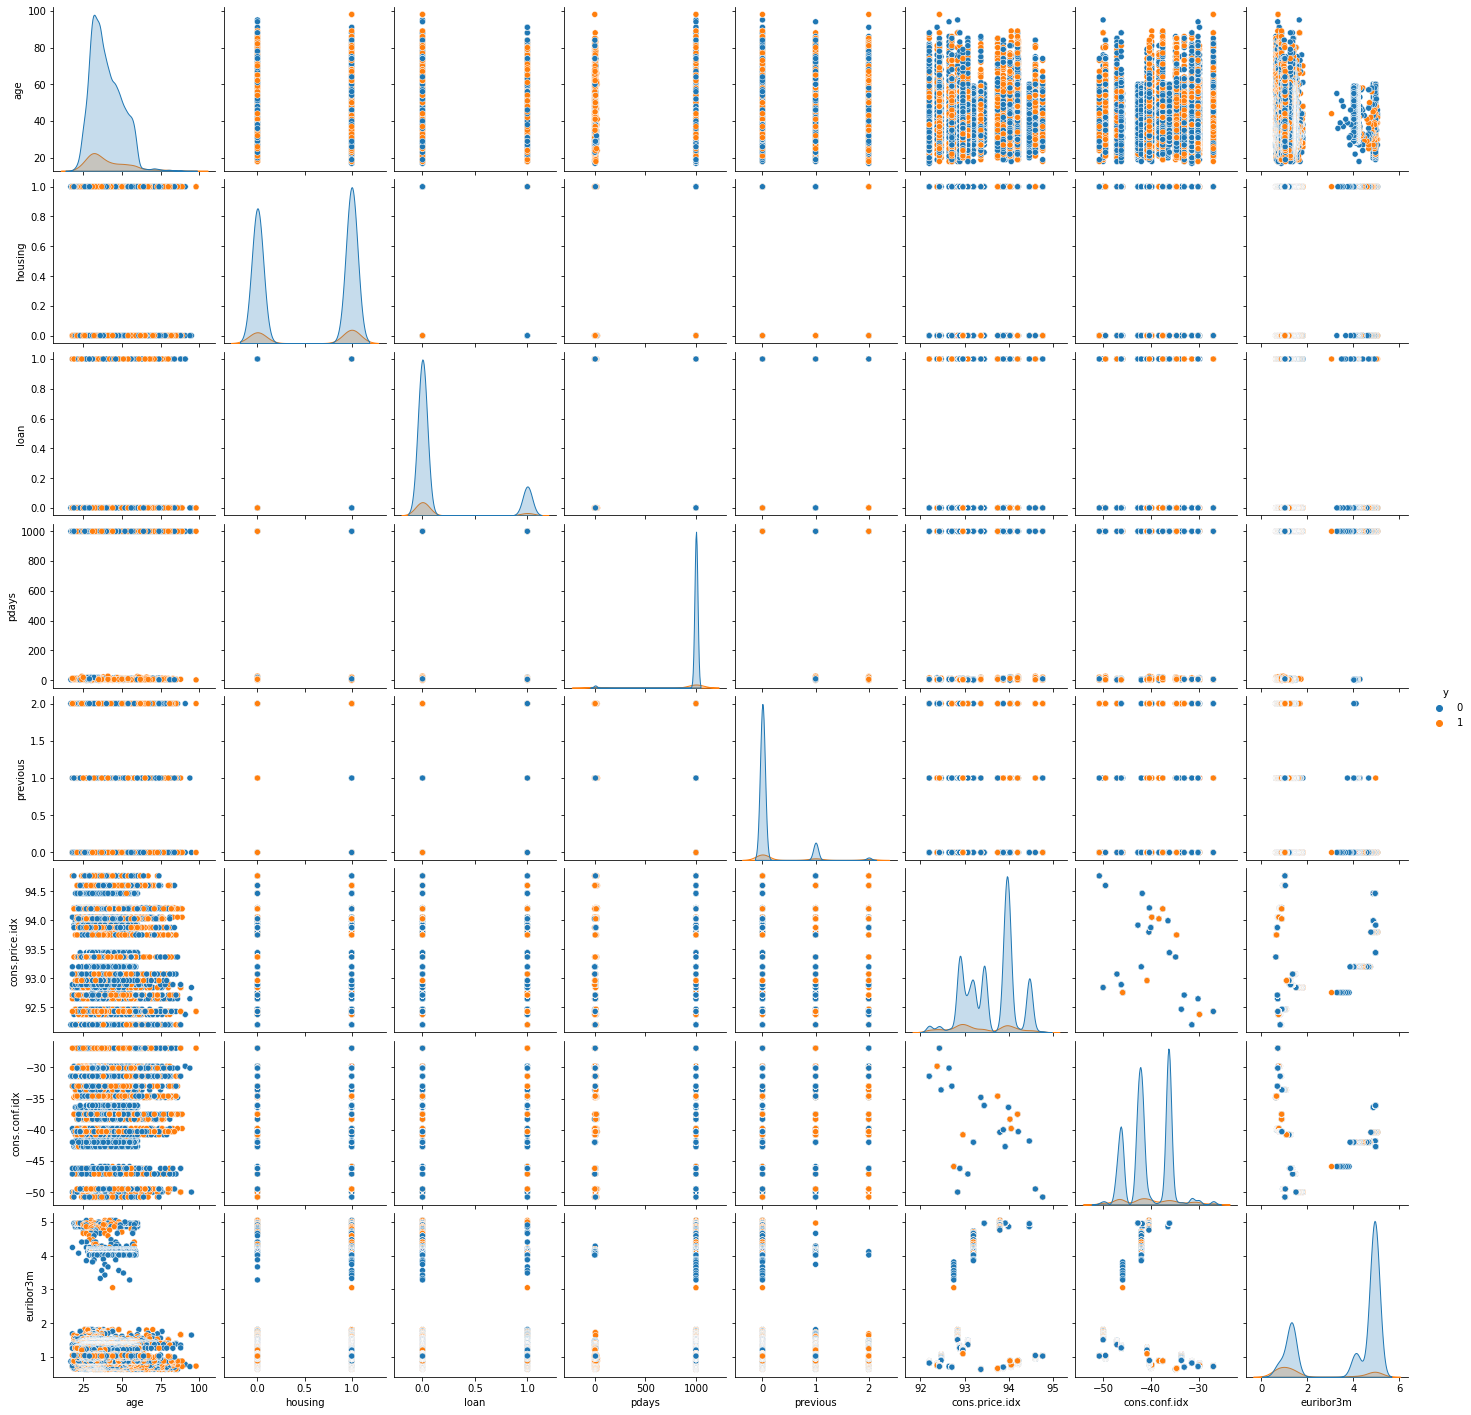

In [44]:
# visualizing numerical columns
sns.pairplot(hue='y', data = df)
plt.show()

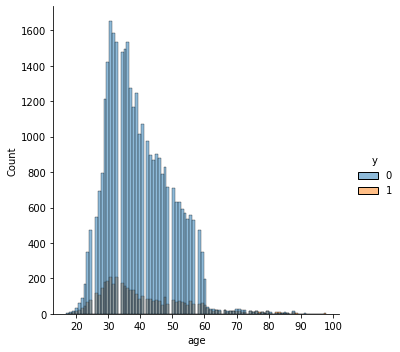

In [45]:
sns.displot(x = 'age', hue='y', data=df)
plt.show()

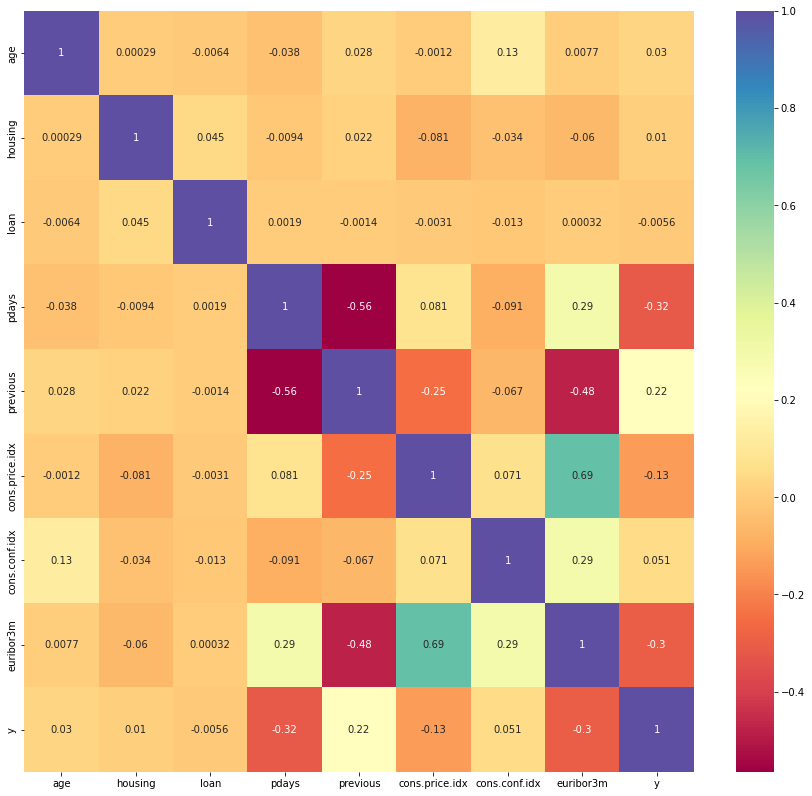

In [46]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

# One Hot Encoding for categorical variables

In [47]:
# Get the dummy variables for contact, poutcome , job, month, marital, day_of_week, education
# Let's drop the first column from  using 'drop_first = True' as first column can be derived using other columns 
# (dropping redundant column)

contact = pd.get_dummies(df.contact, drop_first=True)
poutcome = pd.get_dummies(df.poutcome, drop_first=True)
job = pd.get_dummies(df.job, drop_first=True)
month = pd.get_dummies(df.month, drop_first=True)
marital = pd.get_dummies(df.marital, drop_first=True)
day_of_week = pd.get_dummies(df.day_of_week, drop_first=True)
education = pd.get_dummies(df.education, drop_first=True)

In [48]:
# Concat the dummy columns to the dataframe
df = pd.concat([df, contact, poutcome , job, month, marital, day_of_week, education], axis=1)
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,pdays,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,housemaid,married,basic.4y,0,0,telephone,may,mon,999,...,1,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,0,0,telephone,may,mon,999,...,1,0,0,0,0,0,1,0,0,0
2,37,services,married,high.school,1,0,telephone,may,mon,999,...,1,0,0,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,0,0,telephone,may,mon,999,...,1,0,0,0,1,0,0,0,0,0
4,56,services,married,high.school,0,1,telephone,may,mon,999,...,1,0,0,0,0,0,1,0,0,0


In [49]:
# Dropping contact, poutcome , job, month, marital, day_of_week, education as we have concatenated the dummies in our original dataframe
df.drop(['contact', 'poutcome' , 'job', 'month', 'marital', 'day_of_week', 'education'], axis = 1, inplace = True)
df.head()

,age,housing,loan,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,0,0,999,0,93.994,-36.4,4.857,0,1,...,1,0,0,0,0,0,0,0,0,0
1,57,0,0,999,0,93.994,-36.4,4.857,0,1,...,1,0,0,0,0,0,1,0,0,0
2,37,1,0,999,0,93.994,-36.4,4.857,0,1,...,1,0,0,0,0,0,1,0,0,0
3,40,0,0,999,0,93.994,-36.4,4.857,0,1,...,1,0,0,0,1,0,0,0,0,0
4,56,0,1,999,0,93.994,-36.4,4.857,0,1,...,1,0,0,0,0,0,1,0,0,0


In [50]:
df.columns, len(df.columns)

(Index(['age', 'housing', 'loan', 'pdays', 'previous', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'y', 'telephone', 'nonexistent',
        'success', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep', 'married', 'single', 'mon', 'thu', 'tue', 'wed', 'basic.6y',
        'basic.9y', 'high.school', 'illiterate', 'professional.course',
        'university.degree'],
       dtype='object'),
 43)

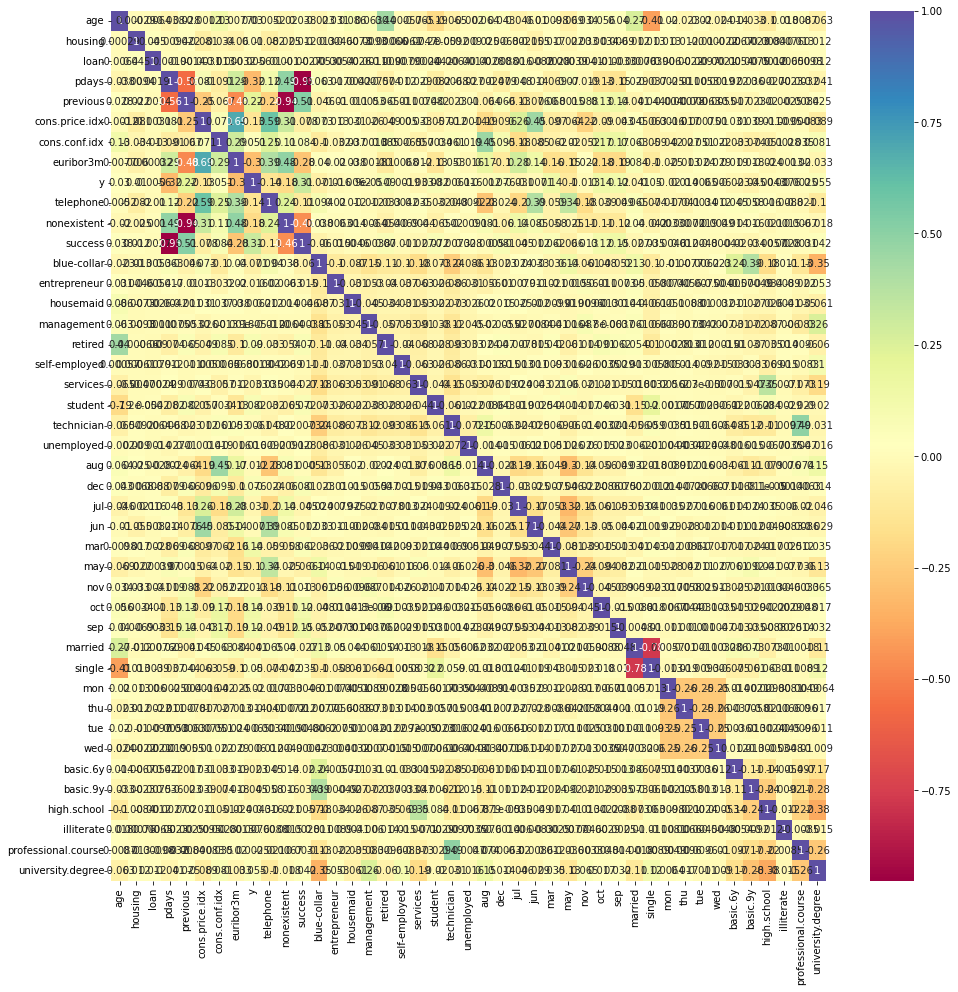

In [51]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

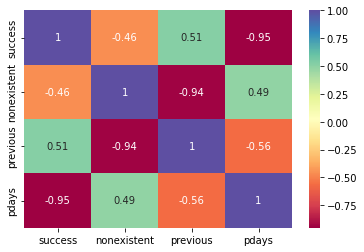

In [52]:
sns.heatmap(df[['success', 'nonexistent', 'previous', 'pdays']].corr(), annot=True, cmap='Spectral')
plt.show()

**Negative Correlation:** 
<br>    1. Previous v/s Nonexistent
<br>    2. Pdays v/s Success

In [53]:
df.drop(['previous', 'pdays'], axis = 1, inplace = True)

In [54]:
var_numerical = list(set(var_numerical) - set(['previous', 'pdays']))

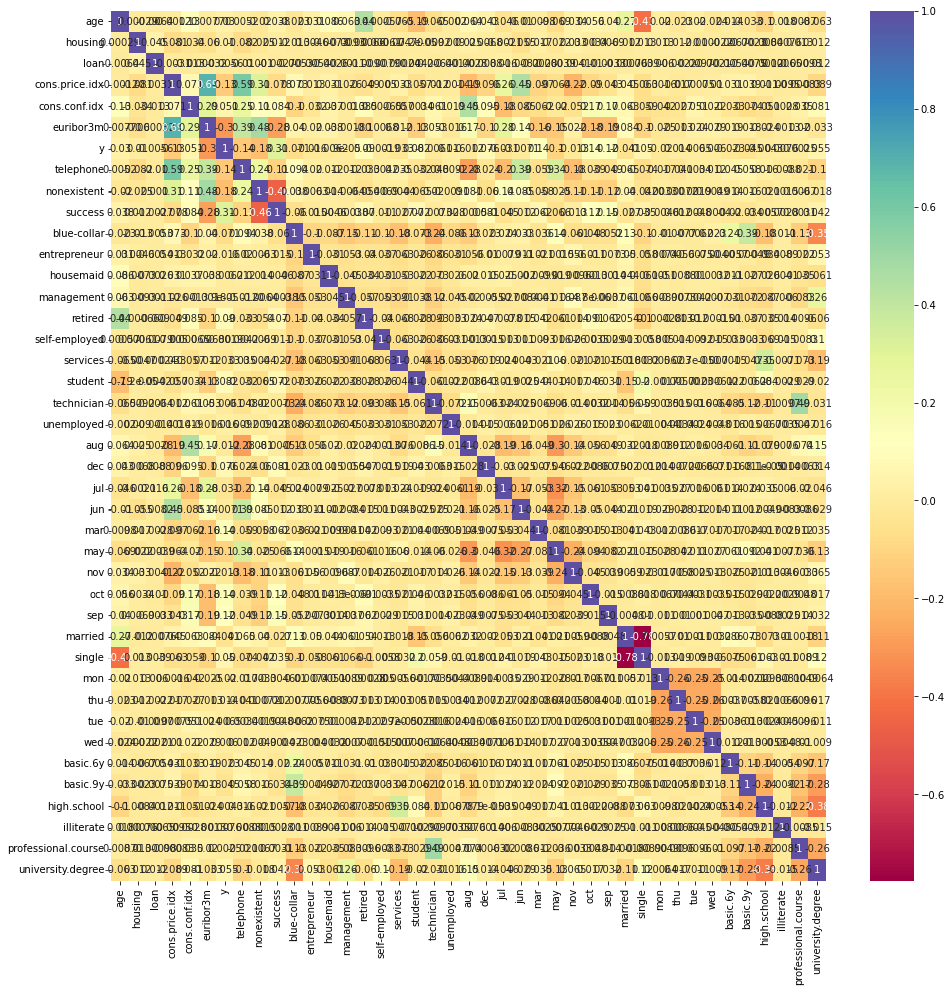

In [55]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

In [56]:
df.corr()['y']

age                    0.030130
housing                0.009996
loan                  -0.005603
cons.price.idx        -0.133084
cons.conf.idx          0.051424
euribor3m             -0.300580
y                      1.000000
telephone             -0.140866
nonexistent           -0.184489
success                0.311555
blue-collar           -0.071404
entrepreneur          -0.015897
housemaid             -0.006232
management             0.000090
retired                0.089646
self-employed         -0.001888
services              -0.032759
student                0.082182
technician            -0.006091
unemployed             0.016334
aug                   -0.012077
dec                    0.075847
jul                   -0.030556
jun                   -0.007129
mar                    0.144351
may                   -0.104725
nov                   -0.013458
oct                    0.142853
sep                    0.123514
married               -0.040845
single                 0.050106
mon     

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38245 non-null  int64  
 1   housing              38245 non-null  int64  
 2   loan                 38245 non-null  int64  
 3   cons.price.idx       38245 non-null  float64
 4   cons.conf.idx        38245 non-null  float64
 5   euribor3m            38245 non-null  float64
 6   y                    38245 non-null  int64  
 7   telephone            38245 non-null  uint8  
 8   nonexistent          38245 non-null  uint8  
 9   success              38245 non-null  uint8  
 10  blue-collar          38245 non-null  uint8  
 11  entrepreneur         38245 non-null  uint8  
 12  housemaid            38245 non-null  uint8  
 13  management           38245 non-null  uint8  
 14  retired              38245 non-null  uint8  
 15  self-employed        38245 non-null 

# Split Data Into Train and Test

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# We will divide the training and testing set in 80% and 20% respectively
# We used random_state = 100 so that everytime we run it we will have same set of training and testing set
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 100)

In [60]:
print("Train Dataset: "+ str(len(df_train)) + " Test Dataset: " + str(len(df_test)))
print("Train Target Label counts: ")
print(df_train["y"].value_counts())
print("Test Target Label counts: ")
print(df_test["y"].value_counts())

Train Dataset: 30596 Test Dataset: 7649
Train Target Label counts: 
0    27144
1     3452
Name: y, dtype: int64
Test Target Label counts: 
0    6843
1     806
Name: y, dtype: int64


# Rescaling the continuous variables

Our data is not normally distributed so we will use MinMaxScaler. It can also handle some of the outliers which we have in our data.

In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [62]:
# MinMaxScaler Object
scaler = MinMaxScaler()

In [63]:
# Fit and Transform the data
# Fit will calculate our Min and Max values
# Transform will operate on standardisation function and scales our values
df_train[var_numerical] = scaler.fit_transform(df_train[var_numerical])

In [64]:
# Transform will operate on standardisation function and scales our values
df_test[var_numerical] = scaler.transform(df_test[var_numerical])

In [65]:
df_train.head()

,age,housing,loan,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,nonexistent,success,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
17301,0.098765,1,1,0.669135,0.338912,0.981183,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
26425,0.407407,1,0,0.389322,0.368201,0.780322,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
38271,0.111111,1,0,0.089634,1.000000,0.024484,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
24709,0.382716,1,0,0.389322,0.368201,0.806393,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2160,0.148148,1,0,0.698753,0.602510,0.957379,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0


In [66]:
df_test.head()

,age,housing,loan,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,nonexistent,success,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
19269,0.407407,0,1,0.484412,0.615063,0.982317,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
17957,0.358025,0,0,0.669135,0.338912,0.980957,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
22711,0.506173,0,0,0.484412,0.615063,0.981637,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
20420,0.395062,1,0,0.484412,0.615063,0.982090,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
38658,0.246914,0,0,0.174591,0.866109,0.019270,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38245 non-null  int64  
 1   housing              38245 non-null  int64  
 2   loan                 38245 non-null  int64  
 3   cons.price.idx       38245 non-null  float64
 4   cons.conf.idx        38245 non-null  float64
 5   euribor3m            38245 non-null  float64
 6   y                    38245 non-null  int64  
 7   telephone            38245 non-null  uint8  
 8   nonexistent          38245 non-null  uint8  
 9   success              38245 non-null  uint8  
 10  blue-collar          38245 non-null  uint8  
 11  entrepreneur         38245 non-null  uint8  
 12  housemaid            38245 non-null  uint8  
 13  management           38245 non-null  uint8  
 14  retired              38245 non-null  uint8  
 15  self-employed        38245 non-null 

# Dividing into X and Y sets for the model building

In [68]:
# Divide the train data into X and y

y_train = df_train.pop('y')
X_train = df_train

In [69]:
# Divide the test data into X and y

y_test = df_test.pop('y')
X_test = df_test

In [70]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30596, 40), (30596,), (7649, 40), (7649,))

# Model Building 

We will user AUC for performance metrics as the target class is imbalanced.

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
from sklearn import metrics

In [74]:
# Draw ROC curve from training and test data probability
def draw_roc( train_actual, train_probs, test_actual, test_probs ):
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve( train_actual, train_probs,
                                              drop_intermediate = False )
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve( test_actual, test_probs,
                                              drop_intermediate = False )
    train_auc_score = metrics.roc_auc_score( train_actual, train_probs )
    test_auc_score = metrics.roc_auc_score( test_actual, test_probs )
    plt.figure(figsize=(5, 5))
    plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
    plt.plot( test_fpr, test_tpr, label='ROC curve (area = %0.2f)' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [75]:
# Train model using hyperparmeter tuning
def training_model_hyperparameter(model, scoring, params_grid, X_train, y_train):
    folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state=100)

    grid = GridSearchCV(estimator = model, scoring=scoring, param_grid = params_grid, cv = folds, 
                           verbose=0, return_train_score=True, n_jobs=3)
    grid.fit(X_train, y_train)
    return grid

In [76]:
# Predict values and propability of training and testing data
def prediction_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    return y_train_pred, y_train_pred_prob, y_test_pred, y_test_pred_prob

# i. Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

#### a. Train Model

In [78]:
logreg = LogisticRegression(solver='lbfgs', random_state = 100)
logreg = logreg.fit(X_train, y_train)

In [79]:
y_train_pred, y_train_pred_prob, y_test_pred,y_test_pred_prob= prediction_model(logreg, X_train, y_train, X_test, y_test)

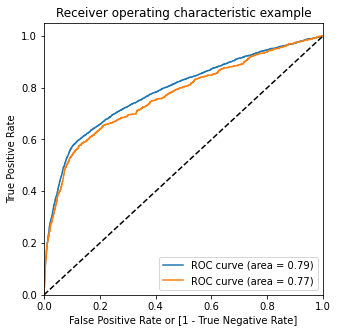

In [80]:
draw_roc(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

In [81]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

Accuracy train:  0.899660086285789
Accuracy test:  0.9039090077134266


# ii. Feature Selection Using RFE with 20 Features

In [82]:
from sklearn.feature_selection import RFE

In [83]:
logreg_rfe20 = LogisticRegression(random_state = 100)

In [84]:
rfe20 = RFE(logreg_rfe20, n_features_to_select = 20)
rfe20 = rfe20.fit(X_train, y_train)

In [85]:
# Column name, RFE is True/False, Ranking of column
print(list(zip(X_train, rfe20.support_,rfe20.ranking_)))
# Columns with RFE Support as True
col = X_train.columns[rfe20.support_]
print(len(col), col)
# Columns with RFE Support as False
X_train.columns[~rfe20.support_]

[('age', True, 1), ('housing', False, 9), ('loan', False, 5), ('cons.price.idx', True, 1), ('cons.conf.idx', True, 1), ('euribor3m', True, 1), ('telephone', True, 1), ('nonexistent', True, 1), ('success', True, 1), ('blue-collar', True, 1), ('entrepreneur', False, 13), ('housemaid', True, 1), ('management', False, 17), ('retired', True, 1), ('self-employed', False, 21), ('services', True, 1), ('student', True, 1), ('technician', False, 18), ('unemployed', False, 20), ('aug', False, 8), ('dec', True, 1), ('jul', True, 1), ('jun', True, 1), ('mar', True, 1), ('may', True, 1), ('nov', False, 7), ('oct', True, 1), ('sep', False, 6), ('married', False, 19), ('single', False, 10), ('mon', True, 1), ('thu', False, 11), ('tue', False, 12), ('wed', False, 2), ('basic.6y', False, 16), ('basic.9y', False, 4), ('high.school', False, 14), ('illiterate', True, 1), ('professional.course', False, 15), ('university.degree', False, 3)]
20 Index(['age', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'te

Index(['housing', 'loan', 'entrepreneur', 'management', 'self-employed',
       'technician', 'unemployed', 'aug', 'nov', 'sep', 'married', 'single',
       'thu', 'tue', 'wed', 'basic.6y', 'basic.9y', 'high.school',
       'professional.course', 'university.degree'],
      dtype='object')

In [86]:
# Creating X_train_rfe dataframe with RFE selected variables

X_train_rfe20 = X_train[col]
X_test_rfe20 = X_test[col]

In [87]:
logreg_rfe20 = LogisticRegression(random_state = 100)
logreg_rfe20 = logreg_rfe20.fit(X_train_rfe20, y_train)

In [88]:
y_train_pred_rfe20, y_train_pred_rfe20_prob, y_test_pred_rfe20, y_test_pred_rfe20_prob = prediction_model(logreg_rfe20, X_train_rfe20, y_train, X_test_rfe20, y_test)

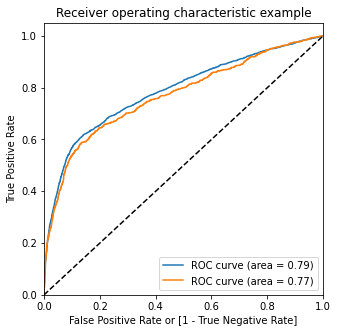

In [89]:
draw_roc(y_train, y_train_pred_rfe20_prob, y_test, y_test_pred_rfe20_prob)

In [90]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_rfe20))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_rfe20))

Accuracy train:  0.8997908223297163
Accuracy test:  0.9039090077134266


# iii. Training model with hyperparameter Tuning

In [91]:
lr_model = LogisticRegression()

In [92]:
# Create the param grid for logistic regression
lr_param_grid = {
    'max_iter': [75, 100, 125],
    'penalty': ['l1', 'l2'],
    'C': [0.5 , 1, 1.5],
    'solver': ['liblinear', 'lbfgs']
}
print(lr_param_grid)

{'max_iter': [75, 100, 125], 'penalty': ['l1', 'l2'], 'C': [0.5, 1, 1.5], 'solver': ['liblinear', 'lbfgs']}


In [93]:
lr_grid = training_model_hyperparameter(lr_model, 'roc_auc', lr_param_grid, X_train, y_train)

In [94]:
y_train_pred_lr, y_train_pred_lr_prob, y_test_pred_lr, y_test_pred_lr_prob = \
                                    prediction_model(lr_grid, X_train, y_train, X_test, y_test)

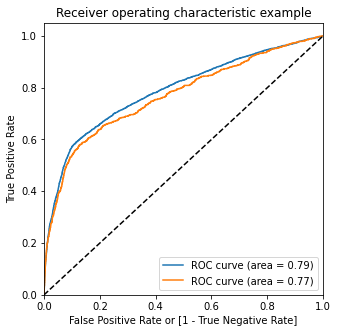

In [95]:
draw_roc(y_train, y_train_pred_lr_prob, y_test, y_test_pred_lr_prob)

In [96]:
lr_grid.best_params_

{'C': 0.5, 'max_iter': 125, 'penalty': 'l1', 'solver': 'liblinear'}

In [97]:
cv_results = pd.DataFrame(lr_grid.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.695210,0.087187,0.010858,0.005784,0.5,75,l1,liblinear,"{'C': 0.5, 'max_iter': 75, 'penalty': 'l1', 's...",0.801250,...,0.789418,0.788168,0.786910,0.789755,0.790037,0.789968,0.786289,0.789451,0.788546,0.001368
1,0.020708,0.006008,0.000000,0.000000,0.5,75,l1,lbfgs,"{'C': 0.5, 'max_iter': 75, 'penalty': 'l1', 's...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.224729,0.023719,0.009605,0.007854,0.5,75,l2,liblinear,"{'C': 0.5, 'max_iter': 75, 'penalty': 'l2', 's...",0.800736,...,0.789694,0.788475,0.787329,0.790097,0.790410,0.790179,0.786447,0.789879,0.788843,0.001394
3,0.400575,0.029700,0.009499,0.007763,0.5,75,l2,lbfgs,"{'C': 0.5, 'max_iter': 75, 'penalty': 'l2', 's...",0.800592,...,0.789620,0.788439,0.787304,0.790044,0.790386,0.790188,0.786427,0.789895,0.788814,0.001394
4,0.654213,0.091513,0.008045,0.007860,0.5,100,l1,liblinear,"{'C': 0.5, 'max_iter': 100, 'penalty': 'l1', '...",0.801258,...,0.789418,0.788167,0.786916,0.789752,0.790035,0.789976,0.786286,0.789454,0.788547,0.001368
5,0.020086,0.007312,0.000000,0.000000,0.5,100,l1,lbfgs,"{'C': 0.5, 'max_iter': 100, 'penalty': 'l1', '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.224831,0.019509,0.005257,0.006659,0.5,100,l2,liblinear,"{'C': 0.5, 'max_iter': 100, 'penalty': 'l2', '...",0.800736,...,0.789694,0.788475,0.787329,0.790097,0.790410,0.790179,0.786447,0.789879,0.788843,0.001394
7,0.404996,0.023976,0.006472,0.007935,0.5,100,l2,lbfgs,"{'C': 0.5, 'max_iter': 100, 'penalty': 'l2', '...",0.800592,...,0.789620,0.788439,0.787304,0.790044,0.790386,0.790188,0.786427,0.789895,0.788814,0.001394
8,0.611676,0.062403,0.008282,0.007715,0.5,125,l1,liblinear,"{'C': 0.5, 'max_iter': 125, 'penalty': 'l1', '...",0.801247,...,0.789421,0.788167,0.786910,0.789753,0.790038,0.789976,0.786287,0.789453,0.788547,0.001370
9,0.015963,0.006095,0.000000,0.000000,0.5,125,l1,lbfgs,"{'C': 0.5, 'max_iter': 125, 'penalty': 'l1', '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
cv_results[["param_max_iter", "param_penalty", "param_solver", "mean_train_score","mean_test_score"]]

,param_max_iter,param_penalty,param_solver,mean_train_score,mean_test_score
0,75,l1,liblinear,0.788546,0.785522
1,75,l1,lbfgs,NaN,NaN
2,75,l2,liblinear,0.788843,0.785323
3,75,l2,lbfgs,0.788814,0.785271
4,100,l1,liblinear,0.788547,0.785521
5,100,l1,lbfgs,NaN,NaN
6,100,l2,liblinear,0.788843,0.785323
7,100,l2,lbfgs,0.788814,0.785271
8,125,l1,liblinear,0.788547,0.785525
9,125,l1,lbfgs,NaN,NaN


In [99]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_lr))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_lr))

Accuracy train:  0.8996274022748072
Accuracy test:  0.9041704798012812



# iv. Random Forest Classifier

#### Train Random Forest Classifier model with hyperparameter tuning

In [100]:
# Create the param grid for random forest
param_grid_rf = [{'n_estimators': [30, 50, 75, 100],
               'max_depth': [5, 6, 7, 8, 9, 10],
               'max_features': [10, 15, 25, 30]}]
print(param_grid_rf)

[{'n_estimators': [30, 50, 75, 100], 'max_depth': [5, 6, 7, 8, 9, 10], 'max_features': [10, 15, 25, 30]}]


In [101]:
rf_model = RandomForestClassifier()

In [102]:
rf_grid = training_model_hyperparameter(rf_model, 'roc_auc', param_grid_rf, X_train, y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
cv_results = pd.DataFrame(rf_grid.cv_results_)
cv_results

In [ ]:
cv_results[["param_max_depth","param_max_features","param_n_estimators","mean_train_score","mean_test_score"]]

In [ ]:
y_train_pred_rf, y_train_pred_rf_prob, y_test_pred_rf, y_test_pred_rf_prob = \
                                    prediction_model(rf_grid, X_train, y_train, X_test, y_test)

In [ ]:
draw_roc(y_train, y_train_pred_rf_prob, y_test, y_test_pred_rf_prob)

In [ ]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_rf))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_rf))

# v. Gradient Boosting Classifier

#### Train Gradient Boosting Classifier model with hyperparameter tuning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier(verbose = 1)

In [ ]:
params_grid_gb = {
    "n_iter_no_change": ['None', 5, 10],
    "n_estimators": [30, 50, 75, 100],
    "learning_rate": [0.05, 0.1, 0.15]
}

In [ ]:
gb_grid = training_model_hyperparameter(gb_model, 'roc_auc', params_grid_gb, X_train, y_train)

In [ ]:
gb_grid.best_params_

In [ ]:
cv_results = pd.DataFrame(gb_grid.cv_results_)
cv_results

In [ ]:
cv_results[["param_learning_rate","param_n_estimators","param_n_iter_no_change","mean_train_score","mean_test_score"]]

In [ ]:
y_train_pred_gb, y_train_pred_gb_prob, y_test_pred_gb, y_test_pred_gb_prob = \
                                    prediction_model(gb_grid, X_train, y_train, X_test, y_test)

In [ ]:
draw_roc(y_train, y_train_pred_gb_prob, y_test, y_test_pred_gb_prob)

In [ ]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_gb))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_gb))

# vi. SVM (Support Vector Machine)

#### Train Gradient Boosting Classifier model with hyperparameter tuning

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()

In [ ]:
params_grid_svc = {
    "kernel": ["linear", "rbf"],
    "degree": [1, 2]
}

In [ ]:
svc_grid = training_model_hyperparameter(svc_model, 'roc_auc', params_grid_svc, X_train, y_train)

In [ ]:
svc_grid.best_params_

In [ ]:
cv_results = pd.DataFrame(svc_grid.cv_results_)
cv_results

In [ ]:
cv_results[["param_kernel","param_degree","mean_train_score","mean_test_score"]]

In [ ]:
print("Accuracy train: ", accuracy_score(y_train, svc_grid.predict(X_train)))
print("Accuracy test: ", accuracy_score(y_test, svc_grid.predict(X_test)))

# vii. XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier()

In [ ]:
# Create the param grid for random forest
param_grid_xgb = {
               'max_depth': [5, 7],
               'max_features': [10, 20, 30]}
print(param_grid_xgb)

In [ ]:
xgb_grid = training_model_hyperparameter(xgb_model, 'roc_auc', param_grid_xgb, X_train, y_train)

In [ ]:
cv_results = pd.DataFrame(xgb_grid.cv_results_)
cv_results

In [ ]:
cv_results[["param_max_depth","param_max_features","mean_train_score","mean_test_score"]]

In [ ]:
y_train_pred_xgb, y_train_pred_xgb_prob, y_test_pred_xgb, y_test_pred_xgb_prob = \
                                    prediction_model(xgb_grid, X_train, y_train, X_test, y_test)

In [ ]:
draw_roc(y_train, y_train_pred_xgb_prob, y_test, y_test_pred_xgb_prob)

In [ ]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_xgb))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_xgb))

# Compare Models

In [ ]:
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve( y_test, y_test_pred_lr_prob,
                                              drop_intermediate = False )
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve( y_test, y_test_pred_rf_prob,
                                              drop_intermediate = False )
gb_fpr, gb_tpr, gb_thresholds = metrics.roc_curve( y_test, y_test_pred_gb_prob,
                                              drop_intermediate = False )
xgb_fpr, xgb_tpr, xgb_thresholds = metrics.roc_curve( y_test, y_test_pred_xgb_prob,
                                              drop_intermediate = False )
lr_auc_score = metrics.roc_auc_score( y_test, y_test_pred_lr_prob )
rf_auc_score = metrics.roc_auc_score( y_test, y_test_pred_rf_prob )
gb_auc_score = metrics.roc_auc_score( y_test, y_test_pred_gb_prob )
xgb_auc_score = metrics.roc_auc_score( y_test, y_test_pred_xgb_prob )
plt.figure(figsize=(5, 5))
plt.plot( lr_fpr, lr_tpr, label='LR ROC curve (area = %0.2f)' % lr_auc_score )
plt.plot( rf_fpr, rf_tpr, label='RF ROC curve (area = %0.2f)' % rf_auc_score )
plt.plot( gb_fpr, gb_tpr, label='GB ROC curve (area = %0.2f)' % gb_auc_score )
plt.plot( gb_fpr, gb_tpr, label='XGB ROC curve (area = %0.2f)' % xgb_auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()